Пропуски по столбцам:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


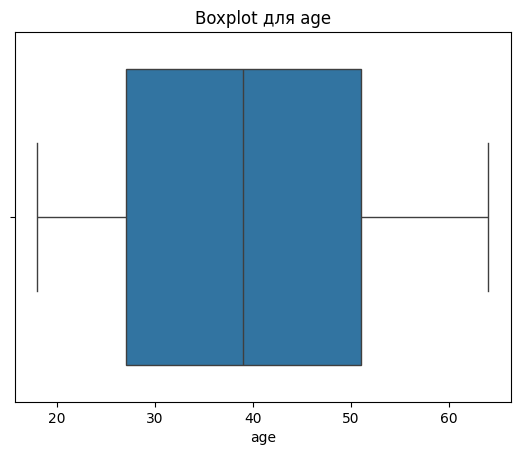

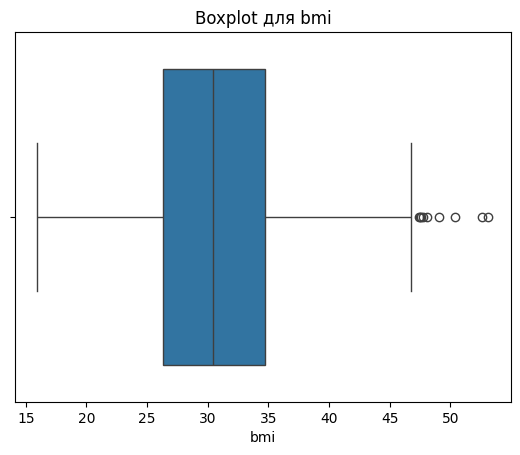

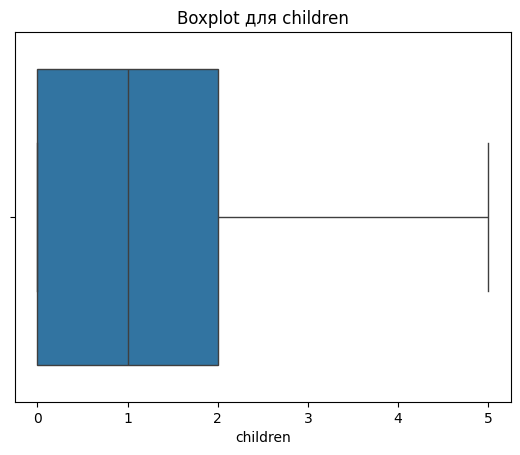

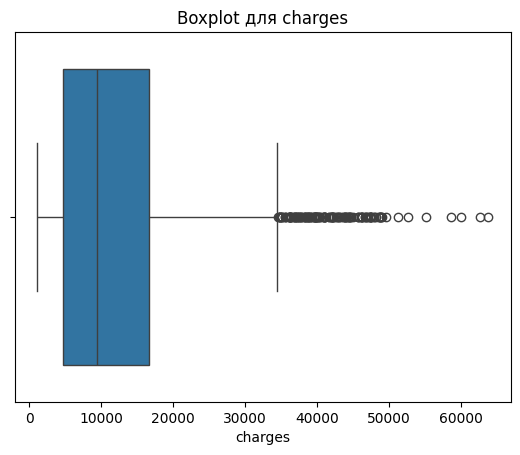


Категориальные признаки: ['sex', 'smoker', 'region']

После кодирования:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


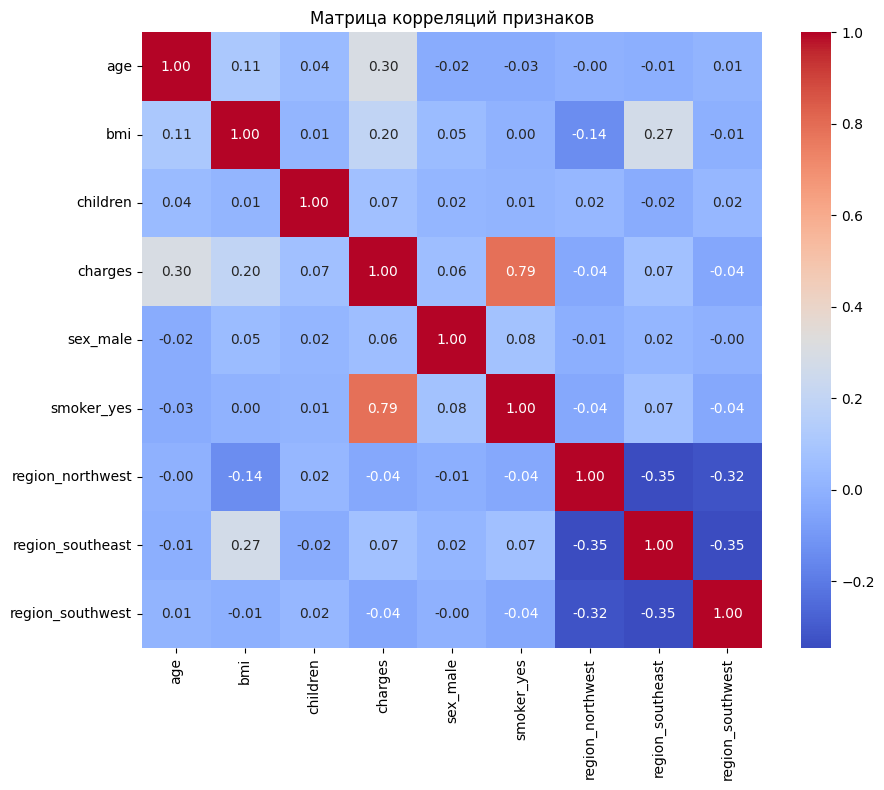

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("insurance.csv")

print("Пропуски по столбцам:")
print(df.isnull().sum())

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot для {col}")
    plt.show()

cat_cols = df.select_dtypes(include=['object']).columns
print("\nКатегориальные признаки:", list(cat_cols))

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\nПосле кодирования:")
print(df_encoded.head())

corr_matrix = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляций признаков")
plt.show()

In [4]:
import numpy as np


y = df_encoded["charges"].values.reshape(-1, 1)

X = df_encoded.drop(columns="charges").values

X = np.hstack([np.ones((X.shape[0], 1)), X])

X = df_encoded.drop(columns="charges").astype(float).values
y = df_encoded["charges"].astype(float).values.reshape(-1, 1)

X = np.hstack([np.ones((X.shape[0], 1)), X])

print("Форма X:", X.shape)
print("Форма y:", y.shape)

Форма X: (1338, 9)
Форма y: (1338, 1)


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (1070, 9)
Размер тестовой выборки: (268, 9)


In [6]:
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

mean = X_train_norm[:, 1:].mean(axis=0)
std = X_train_norm[:, 1:].std(axis=0)

X_train_norm[:, 1:] = (X_train_norm[:, 1:] - mean) / std
X_test_norm[:, 1:] = (X_test_norm[:, 1:] - mean) / std

In [7]:

theta_analytic = np.linalg.inv(X_train_norm.T @ X_train_norm) @ X_train_norm.T @ y_train


y_pred_analytic = X_test_norm @ theta_analytic

mse_analytic = np.mean((y_test - y_pred_analytic) ** 2)

print("Параметры (аналитически):")
print(theta_analytic.flatten())
print("MSE (аналитическое решение):", mse_analytic)

Параметры (аналитически):
[ 1.33460897e+04  3.61497541e+03  2.03622812e+03  5.16890247e+02
 -9.29310107e+00  9.55848141e+03 -1.58140981e+02 -2.90157047e+02
 -3.49110678e+02]
MSE (аналитическое решение): 33596915.85136148


In [8]:
m, n = X_train_norm.shape
theta_gd = np.zeros((n, 1))
alpha = 0.0005  
epochs = 10000    

for i in range(epochs):
    y_pred = X_train_norm @ theta_gd
    error = y_pred - y_train
    grad = (1/m) * (X_train_norm.T @ error)
    theta_gd -= alpha * grad

    if i % 1000 == 0:
        mse = np.mean(error**2)
        print(f"Итерация {i}, MSE = {mse:.2f}")

print("\nПараметры (градиентный спуск):")
print(theta_gd.flatten())

Итерация 0, MSE = 322451733.18
Итерация 1000, MSE = 142548054.13
Итерация 2000, MSE = 76398935.73
Итерация 3000, MSE = 51900816.85
Итерация 4000, MSE = 42775334.12
Итерация 5000, MSE = 39358555.71
Итерация 6000, MSE = 38072554.93
Итерация 7000, MSE = 37585574.85
Итерация 8000, MSE = 37399650.49
Итерация 9000, MSE = 37327789.60

Параметры (градиентный спуск):
[13256.27686484  3580.55134554  2007.16743501   527.48938531
    16.81231458  9479.02104782   -96.92551419  -197.78753085
  -279.70688922]


In [9]:
y_pred_gd = X_test_norm @ theta_gd
mse_gd = np.mean((y_test - y_pred_gd) ** 2)

print("\nСравнение MSE:")
print(f"Аналитически: {mse_analytic:.2f}")
print(f"Градиентный спуск: {mse_gd:.2f}")


Сравнение MSE:
Аналитически: 33596915.85
Градиентный спуск: 33716768.48


In [10]:

lmbd = 0.1 
I = np.eye(n)
I[0, 0] = 0 

theta_ridge_analytic = np.linalg.inv(X_train_norm.T @ X_train_norm + lmbd * I) @ X_train_norm.T @ y_train

y_pred_ridge = X_test_norm @ theta_ridge_analytic
mse_ridge = np.mean((y_test - y_pred_ridge) ** 2)

print("Параметры Ridge (аналитически):")
print(theta_ridge_analytic.flatten())
print("MSE Ridge (аналитическое решение):", mse_ridge)

Параметры Ridge (аналитически):
[ 1.33460897e+04  3.61461300e+03  2.03604135e+03  5.16877409e+02
 -9.22527145e+00  9.55756013e+03 -1.58090031e+02 -2.89995520e+02
 -3.49026397e+02]
MSE Ridge (аналитическое решение): 33597713.08011632


In [11]:

theta_gd_ridge = np.zeros((n, 1))
alpha = 0.0005
epochs = 10000
lmbd = 0.1

for i in range(epochs):
    y_pred = X_train_norm @ theta_gd_ridge
    error = y_pred - y_train
    
    grad = (1/m) * (X_train_norm.T @ error)
    grad[1:] += (lmbd/m) * theta_gd_ridge[1:]
    
    theta_gd_ridge -= alpha * grad

    if i % 1000 == 0:
        mse = np.mean(error**2)
        print(f"Итерация {i}, MSE = {mse:.2f}")

print("\nПараметры Ridge (градиентный спуск):")
print(theta_gd_ridge.flatten())

Итерация 0, MSE = 322451733.18
Итерация 1000, MSE = 142549138.11
Итерация 2000, MSE = 76400871.91
Итерация 3000, MSE = 51902812.73
Итерация 4000, MSE = 42776998.19
Итерация 5000, MSE = 39359801.87
Итерация 6000, MSE = 38073432.79
Итерация 7000, MSE = 37586171.05
Итерация 8000, MSE = 37400046.62
Итерация 9000, MSE = 37328049.62

Параметры Ridge (градиентный спуск):
[13256.27686484  3580.20828428  2007.00070087   527.47037165
    16.86474218  9478.14471468   -96.92290532  -197.69369849
  -279.67619645]


In [12]:
y_pred_gd_ridge = X_test_norm @ theta_gd_ridge
mse_gd_ridge = np.mean((y_test - y_pred_gd_ridge) ** 2)

print("\nСравнение Ridge:")
print(f"MSE аналитическое решение: {mse_ridge:.2f}")
print(f"MSE градиентный спуск:     {mse_gd_ridge:.2f}")


Сравнение Ridge:
MSE аналитическое решение: 33597713.08
MSE градиентный спуск:     33717652.46


In [13]:
mse_mean = np.mean((y_test - y_train.mean()) ** 2)

In [14]:
print(mse_mean)

155391443.68461317
